<a href="https://colab.research.google.com/github/shivangi402/Cardiovascular-Risk-Prediction/blob/main/Team_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**

##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Shivangi Singh
##### **Team Member 2 -** Mohd Samsh

# **Project Summary -**

# **GitHub Link -**https://github.com/shivangi402/Cardiovascular-Risk-Prediction

### **Problem Statement**
**What do you mean by cardiovascular disease?**
<br>
Cardiovascular diseases in general terms, are related to the malfunctioning of the heart or blood vessels. In this, blood flow gets reduced due to various factors in the arteries. These factors include high blood pressure, high low-density lipoprotein (LDL) cholesterol, diabetes, smoking, etc. 
<br>
**Objective**
<br>
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts.The dataset provides the patient's information. It include over 4,000 records and 15 attributes.
<br>
The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD) considering the other features.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing metrics for model evaluation.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing SMOTE for handling class imbalance.
from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#Importing dataset
data_df = pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv")

### Dataset First View

In [ ]:
#Observing the top 5 rows of dataset
data_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
#Size of columns and rows
data_df.shape

(3390, 17)

In [ ]:
print(f'Number of rows : {data_df.shape[0]} \nNumber of columns : {data_df.shape[1]}') 

Number of rows : 3390 
Number of columns : 17


### Dataset Information

In [ ]:
# Dataset Info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data_df.duplicated().sum()
print(f'Number of duplicated values in the dataset is {data_df.duplicated().sum()}')

Number of duplicated values in the dataset is 0


In [ ]:
#Remove unwanted column
data_df.drop(['id'], axis=1, inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data_df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Percetage of missing values
data_df.isnull().sum()*100/len(data_df)

age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

<Axes: >

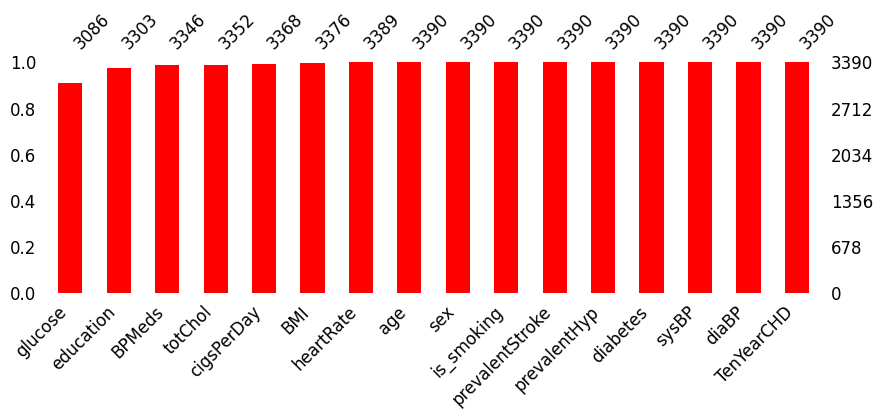

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(data_df, color='red',sort='ascending', figsize=(10,3), fontsize=12)

### What did you know about your dataset?
<br>
The dataset contains the cardiovascular study of the town of Framingham, Massachusetts, residents. We have to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) considering the other features.
<br>
- The dataset includes 3390 rows and 17 columns.
<br>
- The attributes contain the patient's information like BMI, total cholesterol level, glucose level, etc.
<br>
- There are null values available in some attributes which we are going to deal with later on.
<br>
- There is no duplication in values in the dataset.

## ***2. Understanding Your Variables***

###  Columns

In [ ]:
# Dataset Columns
data_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###  Statistical Summary

In [ ]:
#Statistical information about each attribute
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


### Variables Description 

*• **Sex:** male or female("M" or "F")*

*• **Age:** Age of the patient*

*• **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")*

*• **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)*

*• **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)*

*• **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)*

*• **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)*

*• **Diabetes:** whether or not the patient had diabetes (Nominal)*

*• **Tot Chol:** total cholesterol level (Continuous)*

*• **Sys BP:** systolic blood pressure (Continuous)*

*• **Dia BP:** diastolic blood pressure (Continuous)*

*• **BMI:** Body Mass Index (Continuous)*

*• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)*

*• **Glucose:** glucose level (Continuous)*

###***Predict variable (desired target):***

***• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”
, “0” means “No”)***

### Check Unique Values for each variable.

In [ ]:
#Checking unqiue values for each features
data_df.nunique()

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## **3. Data Wrangling**

####  **Numeric and Categorical features**
If feature has more that 10 unique values, we will consider itno numerical features otherwise include into categorical features.

In [ ]:
#Categorising features
Numerical_features = []
Categorical_features = []
for col in data_df.columns:
  if data_df[col].nunique() > 10:
    Numerical_features.append(col)
  else:
      Categorical_features.append(col)

print(f'Numeric feature: {Numerical_features}')
print(f'Categorical feature: {Categorical_features}')




Numeric feature: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Categorical feature: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


**Observation:**

* Most of the attributes in categorical_feature is binary type(0,1).

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

####  **Univariate Analysis**

#####  **Data Distribution of Numeric features**

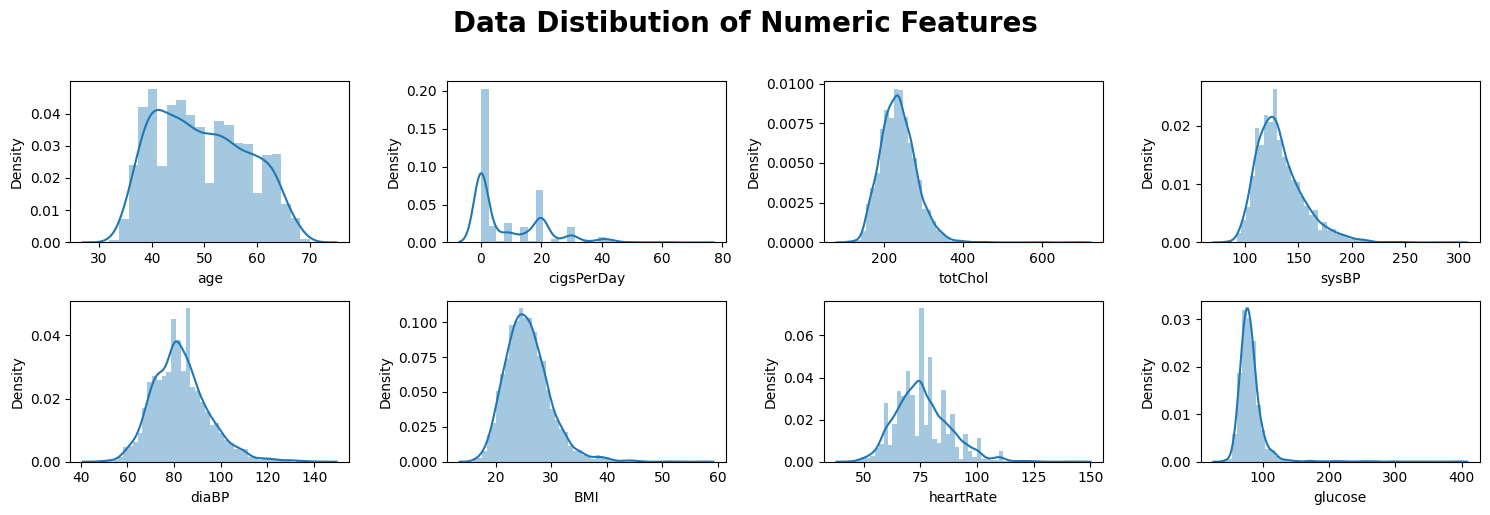

In [ ]:
#Distribution plot
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data Distibution of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(Numerical_features):
  plt.subplot(2, 4, i+1)                       # subplots 2 rows, 4 columns

  # dist plots
  sns.distplot(data_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()   


##### 1. Why did you pick the specific chart?
Answer: Distribution chart shows how data is spread out over an interval or grouped.

##### 2. What is/are the insight(s) found from the chart?
Answer:
<br> 
- Most of the distribution plots are right skewed like cigsPerDay, totchol, diaBP etc.
- Many outliers are present.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: The right skewed data can interfere in machine learing algorithm and thus can lead to neagtive growth.

#####  **Outlier Analysis of Numeric features**

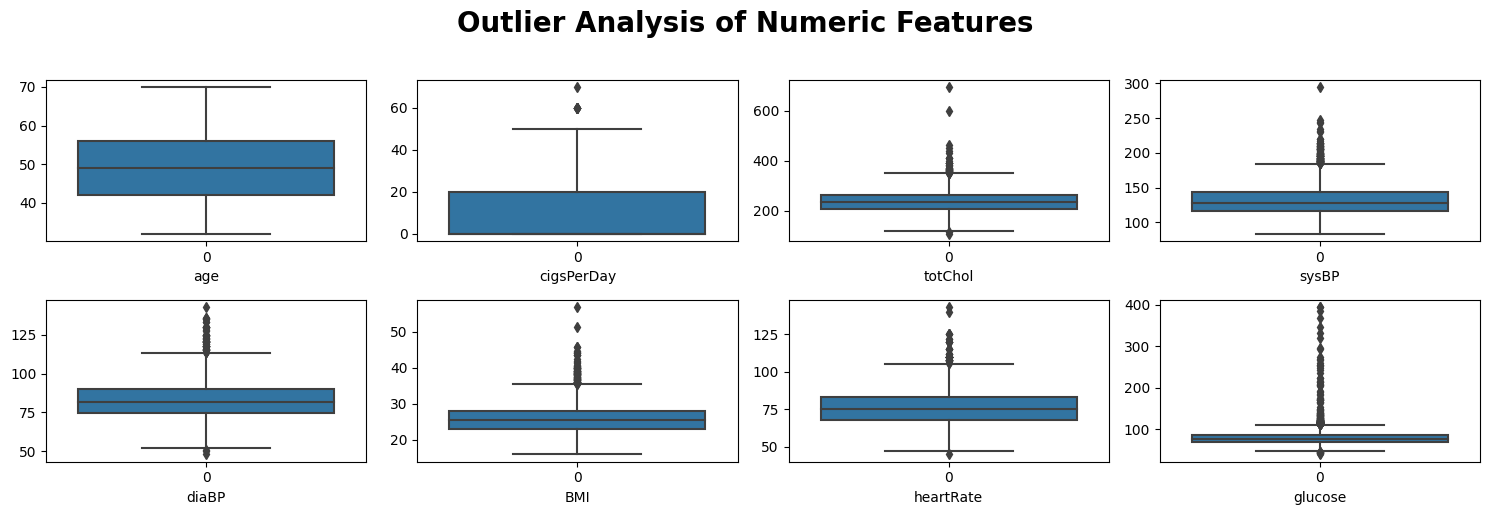

In [ ]:
#Box plot
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(Numerical_features):
  plt.subplot(2, 4, i+1)                       # subplots 2 rows, 4 columns
  
  # boxplots
  sns.boxplot(data_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?
Answer: A box-plot or whisker plot shows the distribution and outliers in the dataset.

##### 2. What is/are the insight(s) found from the chart?
Answer: Many outliers are present like in heartRate and glucose.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: The outliers can interfere in machine learing algorithm and thus can lead to wrong predictions.

####  **Bivariate Analysis**

## **Age**

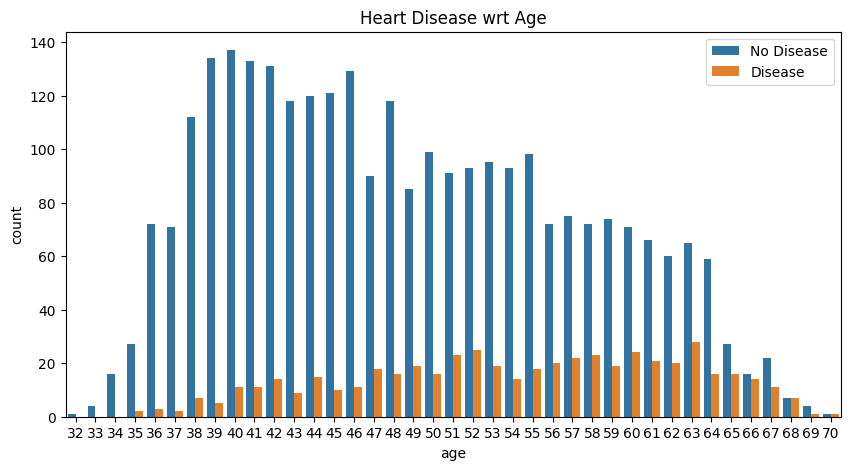

In [ ]:
#Count-plot for heart disease wrt Age
# figsize
plt.figure(figsize=(10, 5))
# countplot
sns.countplot(x='age', hue='TenYearCHD', data=data_df)
# title
plt.title('Heart Disease wrt Age')
plt.legend(['No Disease', 'Disease'])

##### 1. Why did you pick the specific chart?
Answer: A count-plot is used to show count of observation in each categorical bin using bars. 

##### 2. What is/are the insight(s) found from the chart?
Answer: There is some relationship between age and heart disease. As the age increases, the chances of heart disease also increased.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: Yes, the insight will help in predicting the chances of cardiovascular diseases.

## **Checking Linearity**

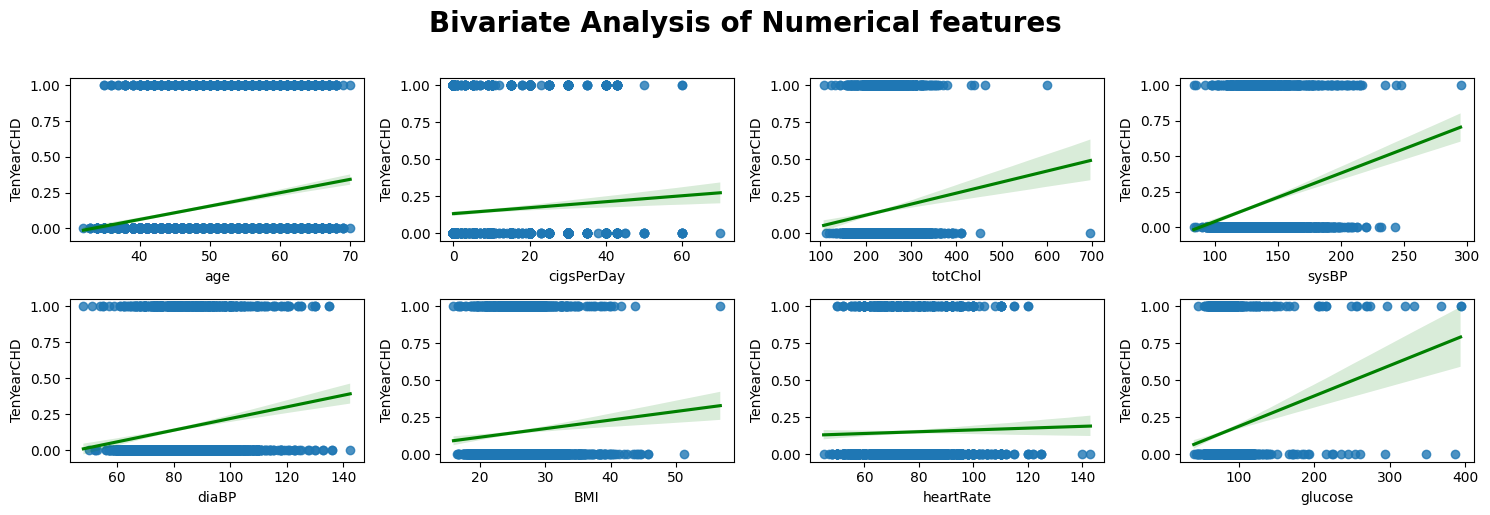

In [ ]:
#Regression plot
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(Numerical_features):
  plt.subplot(2, 4, i+1)                     # subplots of 2 rows and 4 columns

  # regression plots
  sns.regplot(x=data_df[col], y='TenYearCHD', data=data_df,line_kws={"color": "green"})
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?
Answer: Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. 

##### 2. What is/are the insight(s) found from the chart?
Answer: There is positive colinearity between all the variable in our dataset with the target variable(TenYearCHD).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: Yes, the insight will help in feature selection in machine learning algorithm.

##### **Bivariate Analysis of Categorical Features**

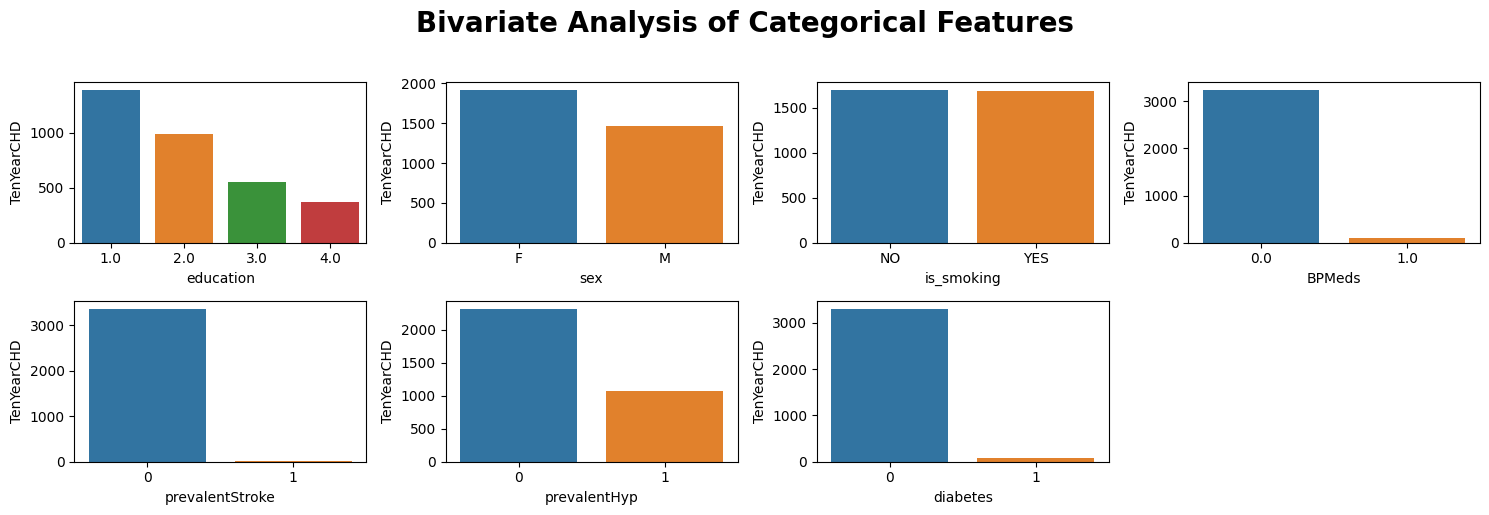

In [ ]:
# Observing number of category present in each feature wrt target feature  

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(Categorical_features[:-1]):       
  plt.subplot(2, 4, i+1)                                  
  a = data_df.groupby(col)[['TenYearCHD']].count().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['TenYearCHD'])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?
Answer: This bar plot shows the categorical feature count with respect to target variable.

##### 2. What is/are the insight(s) found from the chart?
Answer: Most of the attributes are in binary format.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: Yes, it shows the relationship between target and dependent variable.

## **Total_Cholesterol**

Text(0.5, 1.0, 'Distributions of Gender Vs Total Cholesterol with Target class')

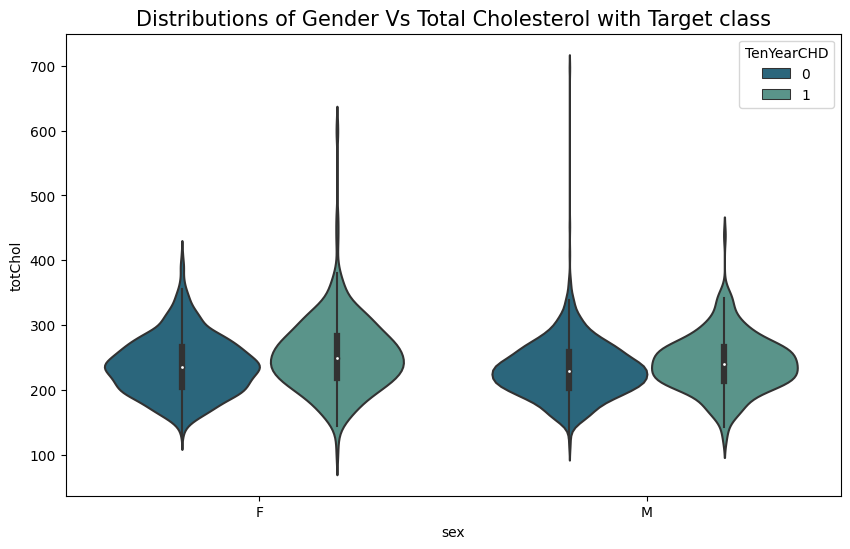

In [ ]:
#plotting the boxplot between sex variable and totChol variable with target class
plt.figure(figsize=(10,6))
sns.violinplot(data=data_df,x="sex", y='totChol',hue="TenYearCHD",palette = 'crest_r')
plt.title("Distributions of Gender Vs Total Cholesterol with Target class",fontsize=15)

##### 1. Why did you pick the specific chart?
Answer: Violin plot is similar to box-plot that shows the distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?
Answer: Female has more cholestrol compared to males. So, more cholestrol leads to increase in CHD problems.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: Yes, it shows the relationship between target and dependent variable.

# **Feature Engineering & Data Pre-processing**

### **Missing Values**

In [ ]:
# Missing Values Percentage
round(data_df.isna().sum()/len(data_df)*100, 2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

In [ ]:
# features which has less than 5%  null values present. 
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# dropping null values
data_df.dropna(subset=nan_columns, inplace=True)

In [ ]:
 #glucose level are continuous in nature. 
data_df['glucose'] = data_df.glucose.fillna(data_df.glucose.median())

#### What all missing value imputation techniques have you used and why did you use those techniques?
<br>
Answer:
<br>
- In healthcare industry, every data is important. So, we are dropping only those rows which less than 5% null values present.
<br>
- Since, glucose level are continuous in nature, we are replacing with its median value. 

In [ ]:
# checking for null values after treating them.
data_df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### **Skewness**

In [ ]:
# statistical summary
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
education,3189.0,1.972719,1.018435,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0
diaBP,3189.0,82.841173,11.993650,48.00,74.50,82.00,89.50,142.5


**Observation:**
<br>
The above information shows that there is high difference between 75% percentile and maximum values. It means the data is highly skewed and filled with outliers.

###  **Handling Outliers**

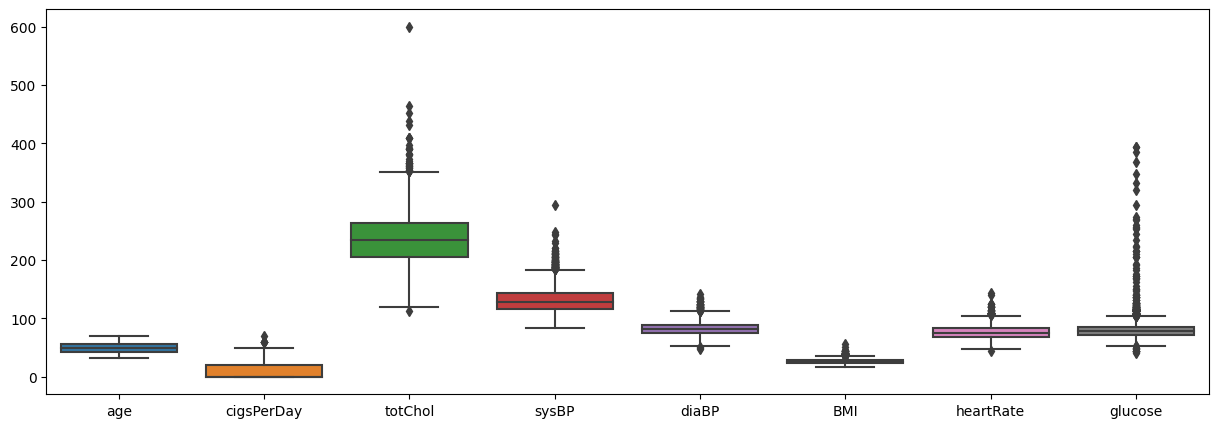

In [ ]:
# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=data_df[Numerical_features])
plt.show()

In [ ]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(data_df):
    for col in data_df[Numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = data_df[col].quantile(0.25)
        q3 = data_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        data_df[col] = data_df[col].clip(lower_bound, upper_bound)
    return data_df

In [ ]:
# using the function to treat outliers
data_df = clip_outliers(data_df)

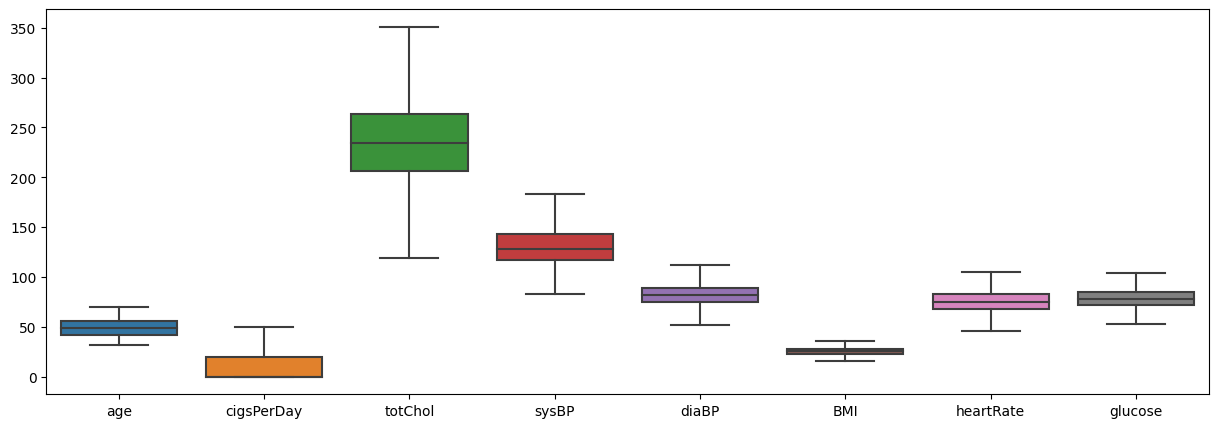

In [ ]:
# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=data_df[Numerical_features])
plt.show() 

##### What all outlier treatment techniques have you used and why did you use those techniques?
<br>
Answer: We have used clipping method to remove outliers. In this method, a cap is set on outlier data. If a value is above or below the threshold values, it is considered as outlier.

### **Encoding**
It is a technique of converting categorical values into numerical values that can easily be used in machine learning algorithm.

In [ ]:
# Label Encoding
data_df['sex'] = data_df['sex'].map({'M':1, 'F':0})
data_df['is_smoking'] = data_df['is_smoking'].map({'YES':1, 'NO':0})

#### What all categorical encoding techniques have you used & why did you use those techniques?
<br>
Answer: Except for the 'sex' and 'is_smoking' columns, almost all of the categories in the dataset are already represented numerically (ordinal). Therefore, we are encoding these two columns.

In [ ]:
# Check Unique Values for each categorical variable.
for i in Categorical_features:
  print("No. of unique values in",i,"is",data_df[i].nunique())

No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in TenYearCHD is 2


In [ ]:
# dropping our target variable from categorical features list
Categorical_features.pop(-1)

'TenYearCHD'

In [ ]:
# check the datatypes of each column in the DataFrame
data_df.dtypes

age                  int64
education          float64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
#Change data-type of categorical features
data_df[Categorical_features] = data_df[Categorical_features].astype(str)

In [ ]:
# checking the result
data_df.dtypes

age                  int64
education           object
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
# one-hot encode the 'education' feature
education_onehot = pd.get_dummies(data_df['education'], prefix='education')

# drop the original education feature
data_df.drop('education', axis=1, inplace=True)

# concatenate the one-hot encoded education feature with the rest of the data
data_df = pd.concat([data_df, education_onehot], axis=1)
data_df.head(3)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0,0,1
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?
<br>
Answer: One-hot encoding: It creates a binary column with 0 and 1 for each features. 1 indicates the presence of category while 0 shows absence of category.

#### **Correlation Coefficient and Heatmap**

<Axes: >

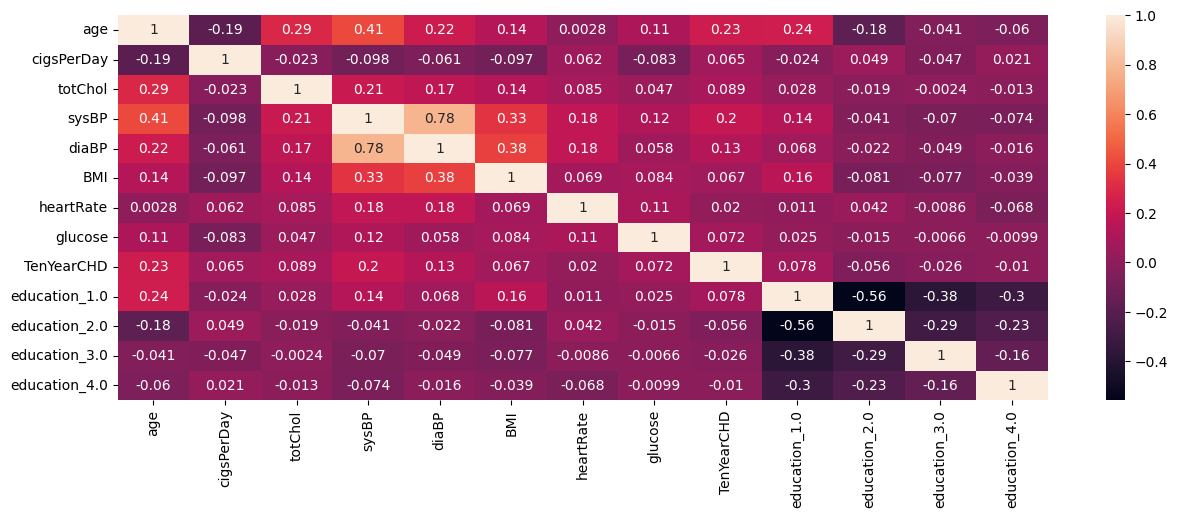

In [ ]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data_df.corr(), annot=True)

##### 1. Why did you pick the specific chart?
<br>
Answer: Heatmap is used to find the correlation between the two variables in the numeric form.

##### 2. What is/are the insight(s) found from the chart?
<br>
Answer: diaBP is highly correlated with sysBP with value of 0.78.

### **Feature Manipulation & Selection**

Pulse pressure is given in two format i.e. sysBP and diaBP. 
<br>
**sysBP(Systolic Blood Pressure) :** The normal range of systolic blood pressure should be 90 - 120 mm Hg.
<br>
**diaBP(Diastolic Blood Pressure) :** The normal range of diastolic blood pressure should be 60 - 80 mm Hg.
<br>
Pulse pressure is the addition of systolic and diastolic blood pressure.

In [ ]:
# Adding new column PulsePressure 
data_df['pulse_pressure'] = data_df['sysBP'] - data_df['diaBP']

# dropping the sysBP and diaBP columns
data_df.drop(columns=['sysBP', 'diaBP'], inplace=True)

Since, is_smoking and cigsperday columns shows the same information about having ciggarates by the person. Removing is_smoking columns from the dataset. 

In [ ]:
# Dropping is_smoking column due to multi-collinearity

data_df.drop('is_smoking', axis=1, inplace=True)

### **Extra Trees Classifier**
Extra tree classifier is an ensemble technique that builds multiple decision trees over the entire dataset. It helps in selecting important features by pruning trees at a particluar node. This can be done by using Gini impurity.

In [ ]:
#Selecting independednt and dependent variable
X = data_df.drop('TenYearCHD', axis=1)
y= data_df['TenYearCHD']

In [ ]:
# importing libarary
from sklearn.ensemble import ExtraTreesClassifier

# model fitting 
model = ExtraTreesClassifier()
model.fit(X,y)

# ranking feature based on importance
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
print(ranked_features.sort_values(ascending=False))

age                0.149470
pulse_pressure     0.137647
BMI                0.128479
totChol            0.125575
glucose            0.122050
heartRate          0.121665
cigsPerDay         0.087881
prevalentHyp       0.024502
sex                0.021162
education_1.0      0.014327
education_2.0      0.013993
education_3.0      0.013035
diabetes           0.011922
education_4.0      0.011276
BPMeds             0.010869
prevalentStroke    0.006146
dtype: float64


### **Chi-square Test**
A Chi-square test is a statistical technique used to find out the difference between observed and expected value. A low p-value in the test indicates that there is a strong relationship between the two variable and the variable can be selected as an important feature of the model.

In [ ]:
# importing libarary
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# model fitting
ordered_rank_features = SelectKBest(score_func=chi2, k='all')
model = ordered_rank_features.fit(X,y)

# ranking feature based on importance
feature_imp = pd.Series(model.scores_,index=X.columns)
feature_imp.sort_values(ascending=False)

pulse_pressure     457.250519
age                249.931510
cigsPerDay         205.859597
totChol            199.719662
prevalentHyp        58.674438
diabetes            27.931583
glucose             27.889622
BPMeds              27.187058
sex                 12.252065
education_1.0       11.262185
BMI                  8.294096
prevalentStroke      7.219641
education_2.0        6.906798
heartRate            2.207399
education_3.0        1.827872
education_4.0        0.287447
dtype: float64

### **Information Gain**
Information gain measures the reduction in entropy by splitting a dataset according to the random attribute. It is used in decision trees to select the feature of high importance as the top root node.

In [ ]:
# importing libarary
from sklearn.feature_selection import mutual_info_classif

# model fitting
mutual_info = mutual_info_classif(X,y)

# ranking feature based on importance. 
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

age                0.025019
prevalentHyp       0.019452
pulse_pressure     0.015244
heartRate          0.010400
sex                0.008390
BMI                0.006985
diabetes           0.005839
education_2.0      0.004371
BPMeds             0.001231
totChol            0.001170
glucose            0.000113
cigsPerDay         0.000000
prevalentStroke    0.000000
education_1.0      0.000000
education_3.0      0.000000
education_4.0      0.000000
dtype: float64

### **Feature Importance**

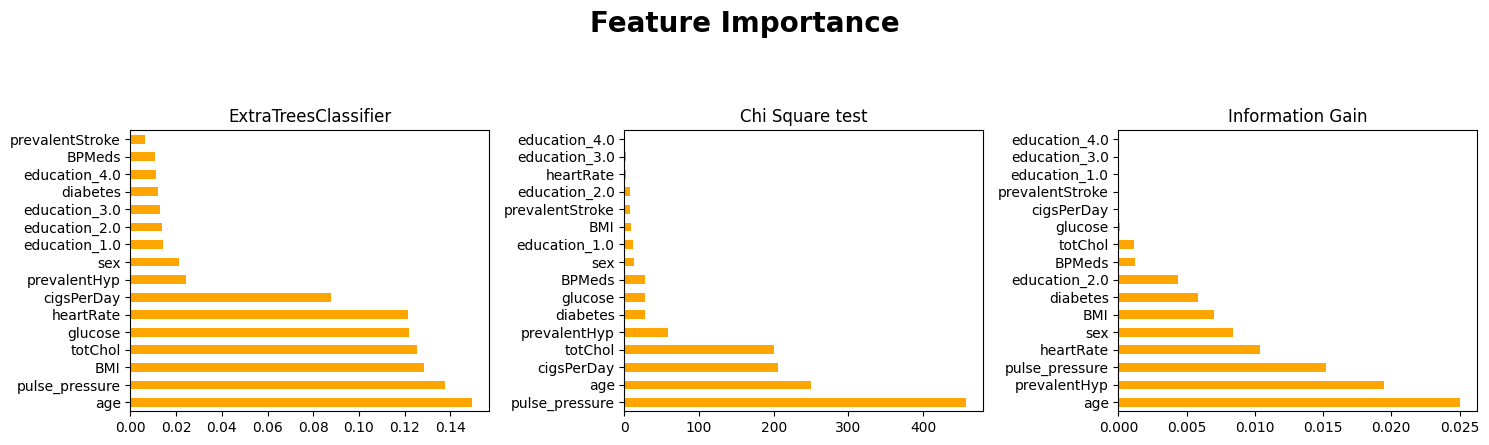

In [ ]:
# plotting graph ---> Feature Importance
fig, axs = plt.subplots(1,3, figsize=(15,4))

ranked_features.sort_values(ascending=False).plot(kind='barh', title='ExtraTreesClassifier', ax=axs[0],color = 'orange')
feature_imp.sort_values(ascending=False).plot(kind='barh', title='Chi Square test', ax=axs[1],color = 'orange')
mutual_data.sort_values(ascending=False).plot(kind='barh', title='Information Gain', ax=axs[2],color = 'orange')

plt.suptitle('Feature Importance', fontsize=20, fontweight='bold', y=1.1)
plt.tight_layout()

##### 1. Why did you pick the specific chart?
<br>
Answer: A horizontal bar chart is used to show the importance of features using three methods.

##### 2. What is/are the insight(s) found from the chart?
<br>
Answer: The two most important feature are pulse_pressure and age.

### **Dependent and Independent Variable**

In [ ]:
# Making new data
newdata_df = data_df.copy()
newdata_df.head(3)


,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure
1,36,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,0,0,0,1,70.0
2,46,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,1,0,0,0,45.0
3,50,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,1,0,0,0,70.0


In [ ]:
#Making independent features(X) and dependednt features(y)
X = newdata_df.drop(columns='TenYearCHD')     
y = newdata_df['TenYearCHD']                  

### **Handling Imbalanced Dataset**

0    2714
1     475
Name: TenYearCHD, dtype: int64
 


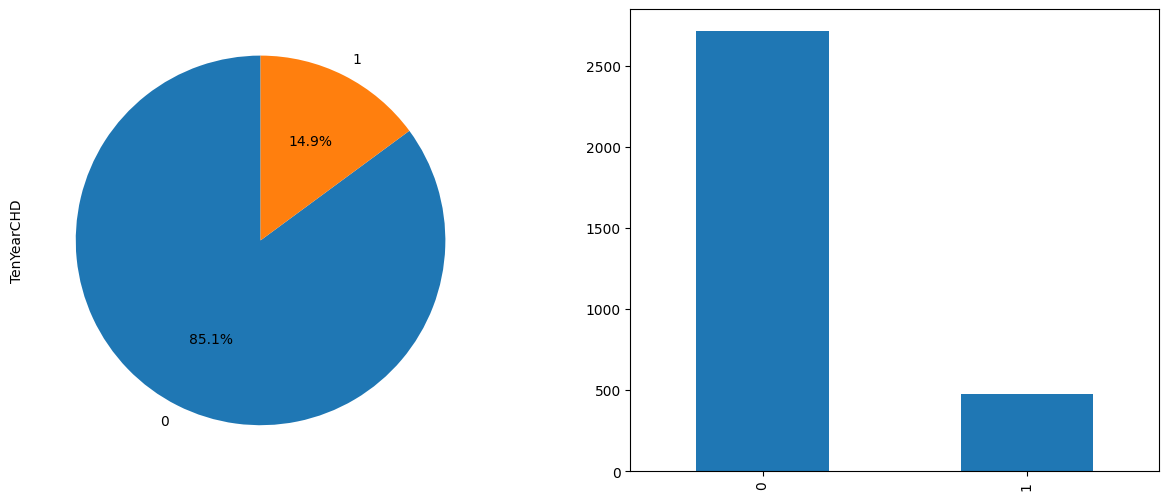

In [ ]:
#Checking data is balanced or not
# Dependant Column Value Counts
print(newdata_df.TenYearCHD.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# pie chart for percentage
newdata_df['TenYearCHD'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])

# bar chart for count
newdata_df['TenYearCHD'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.
Answer: Yes, the target variable is highly imbalanced as we can see in the pe chart also. Around 85% belongs to the popoulation having no risk of heart disease and only 15%  belongs to risk of having disease.  

In [ ]:
#Handling class imbalance using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)
# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 2714, 1: 475})
After Handling Imbalanced class Counter({0: 2714, 1: 2714})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer: SMOTE : SMOTE stands for Synthetic Minority Over-sampling Technique. It is an algorithm used for learning class imbalance in the data. In this method, first we select minority class point and select it k nearest neighbour. Then we create a synthetic samples between the minority instances and its neighbours.

## **Model Building**

### **Train Test Split**

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

print(X_train.shape)
print(X_test.shape)

(4342, 16)
(1086, 16)


### **Scaling Data**

In [ ]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?
Answer: Standard scaler is used to standardize the data by removing the mean and scaling it to unit variable.

### **Performance Metrics**

Performance metrics are used to evaluate the performance of machine learning models. They provide quantitative measures of how well the model is performing in relevant measures. The choice of performance metrics depends on the specific problem and the nature of the data.
<br>
Here are the some performance metrics used to evaluate our models.
<br>
- **Accuracy:** It measures the overall correctness of the model by calculating the ratio of correctly predicted instances to the total number of instances.
- **Precision:** Precision measures the proportion of true positive predictions out of the total predicted positive instances. It is useful when the focus is on minimizing false positives.
- **Recall:** Recall calculates the proportion of true positive predictions out of the total actual positive instances.
- **F1 Score:** F1 score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. 
- **Area Under the ROC Curve (AUC-ROC):** AUC-ROC represents the area under the receiver operating characteristic (ROC) curve, which plots the true positive rate against the false positive rate at various classification thresholds.
- **Confusion Matrix:** A confusion matrix provides a tabular representation of the model's predictions compared to the actual labels. It shows true positives, true negatives, false positives, and false negatives cases.

### **ML Model Implementation**

In [ ]:
# empty list for appending performance metric score 
model_result = []

def predict(ml_model, model_name):
  
  '''
  Pass the model and predict value. 
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  ''' 
  
  # model fitting
  model = ml_model.fit(X_train, y_train)
  
  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics ''' 
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred) 
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')
  
  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')
  
  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)
  
  
  ''' plotting ROC curve '''
  fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title('ROC curve on Test data', weight='bold')
  plt.xlabel('False Positive Rate----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)


  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy, 
                       'test_accuracy':test_accuracy, 
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})

### **Logistic Regression Classifier**
<br>
Logistic regression is generally used for binary classification task. The predictor variable can be continuous or categorical. It applies a logistic function to convert a linear fit model into the range of 0 and 1. 

train accuracy : 0.805
test accuracy : 0.795
train precision : 0.859
test precision : 0.857
train recall : 0.73
test recall : 0.707
train f1 : 0.789
test f1 : 0.775
train roc_auc : 0.887
test roc_auc : 0.877
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       544
           1       0.86      0.71      0.77       542

    accuracy                           0.79      1086
   macro avg       0.80      0.79      0.79      1086
weighted avg       0.80      0.79      0.79      1086

--------------------------------------------------------------------------------


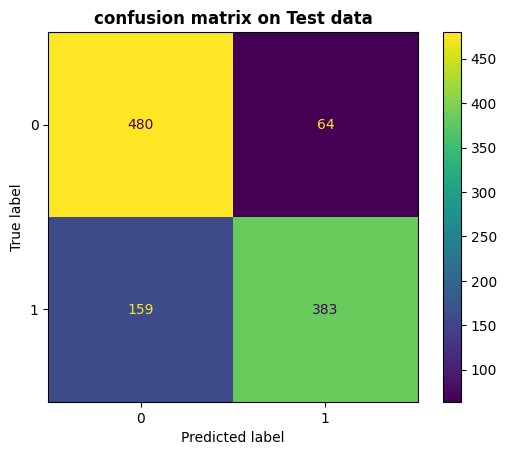

--------------------------------------------------------------------------------
           2291  2137  1740  1969  1703  1947  1004  5397  115   387 
y_actual      0     0     0     0     0     0     0     1     0     0
y_predict     0     0     0     0     1     0     0     1     0     0
--------------------------------------------------------------------------------


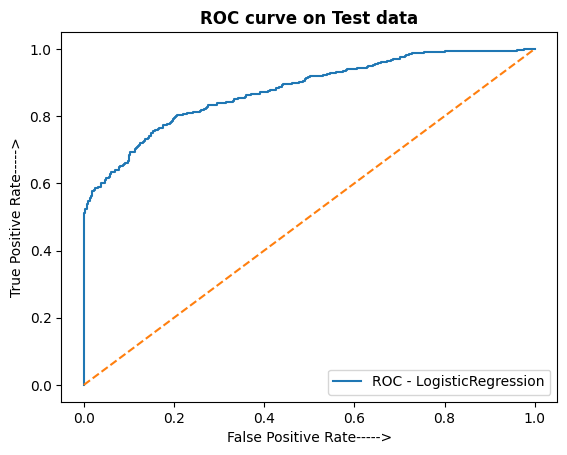

In [ ]:
predict(LogisticRegression(), 'LogisticRegression')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Answer: The model used here is logistic regression classifier.The logistic regression algorithm estimates the optimal coefficients that maximize the likelihood of observing the given set of outcomes based on the predictor variables.

##### 2.  Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer: No, not yet as recall and f1- score are same. We need to apply other machine learning algorithm.

### **SVM (Support Vector Machine)**
<br>
Support vector machine is used in both classification and regression problems. The main objective of the SVM is to find a hyperplane that divides the data into different classes and maximizing the margin between the classes. The margin is the distance between the hyperplane and closest data point from each classes.

train accuracy : 0.863
test accuracy : 0.83
train precision : 0.941
test precision : 0.916
train recall : 0.774
test recall : 0.725
train f1 : 0.849
test f1 : 0.809
train roc_auc : 0.943
test roc_auc : 0.911
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.77      0.93      0.85       544
           1       0.92      0.73      0.81       542

    accuracy                           0.83      1086
   macro avg       0.84      0.83      0.83      1086
weighted avg       0.84      0.83      0.83      1086

--------------------------------------------------------------------------------


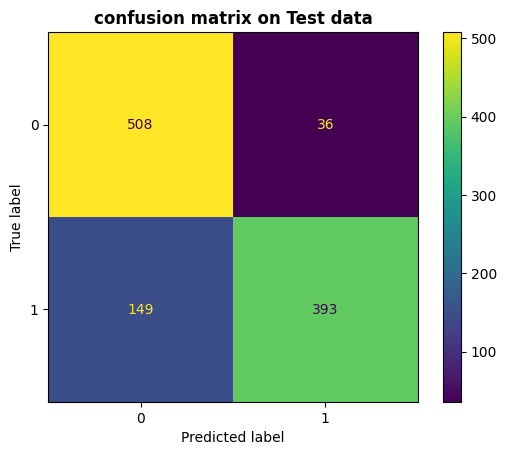

--------------------------------------------------------------------------------
           2291  2137  1740  1969  1703  1947  1004  5397  115   387 
y_actual      0     0     0     0     0     0     0     1     0     0
y_predict     0     0     0     0     0     0     0     1     0     0
--------------------------------------------------------------------------------


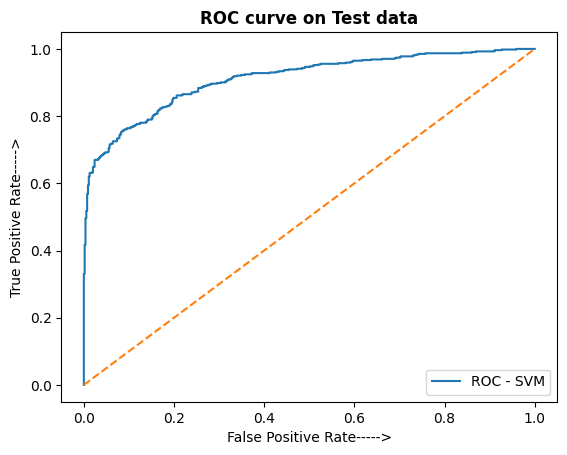

In [ ]:
predict(SVC(probability=True), 'SVM')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Answer: The model used here is support vector machine where we find a hyperplane to divide the different classes. The major goal is to maximize the margin.

##### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer: Yes, the accuracy, f1-score and recall is higher in svm as compared to logistic regression.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.
Answer:
Recall: Recall is particularly important when the cost of false negatives (i.e., failing to identify positive instances) is high. For example, in medical diagnosis, a high recall ensures that fewer cases of a disease go undetected, reducing the risk of potential harm to patients.
<br>
Precision: It quantifies the proportion of true positive predictions among all positive predictions.
<BR>
F1 score: It provides a balanced measure of a model's performance, incorporating both precision and recall.
<br>
Accuracy: It measures the overall correctness of a model's predictions, calculating the proportion of correctly classified instances out of all instances.
<BR>
Effective in high-dimensional spaces: SVMs perform well even in cases where the number of features is greater than the number of samples. This property makes them suitable for tasks with a large number of features, such as text classification.

### **KNN (K-Nearest Neighbours)**
<br>
KNN is used for both classification and regression task. The main objective of the KNN is used to classify a new data point by looking at the k nearest neighbour in the training dataset. The value of k is a user defined parameter that determines the number of neighbours to consider. The distance between two point defines the closest neighbor. The distance can be calculated by Euclidean Distance, Manhattan Distance, Minkowski, Cosine Similarity Measure etc.).

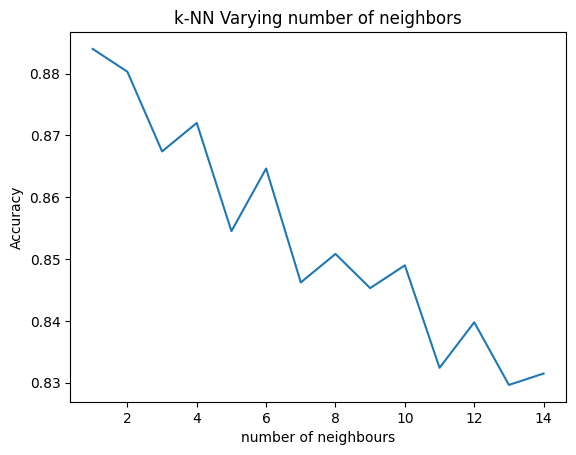

In [ ]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 1.0
test accuracy : 0.884
train precision : 1.0
test precision : 0.848
train recall : 1.0
test recall : 0.935
train f1 : 1.0
test f1 : 0.889
train roc_auc : 1.0
test roc_auc : 0.884
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       544
           1       0.85      0.94      0.89       542

    accuracy                           0.88      1086
   macro avg       0.89      0.88      0.88      1086
weighted avg       0.89      0.88      0.88      1086

--------------------------------------------------------------------------------


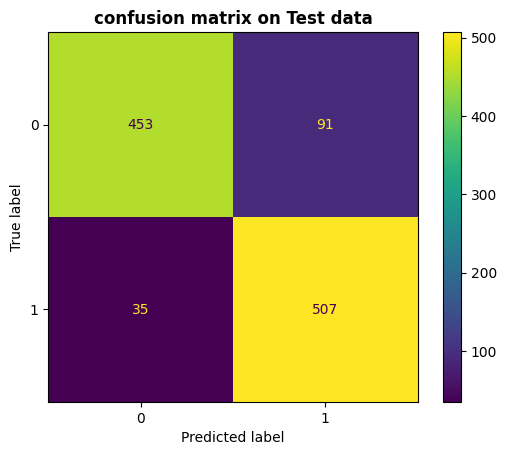

--------------------------------------------------------------------------------
           2291  2137  1740  1969  1703  1947  1004  5397  115   387 
y_actual      0     0     0     0     0     0     0     1     0     0
y_predict     0     0     0     0     1     0     0     1     0     0
--------------------------------------------------------------------------------


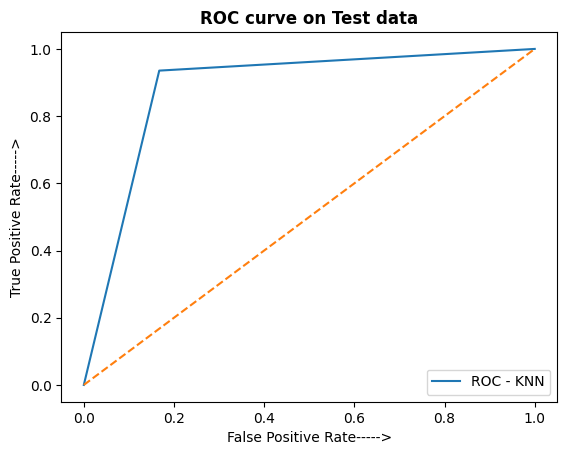

In [ ]:
predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Answer: KNN is a non-parametric method that takes the average or median of the target values of the nearest neighbors to make predictions. 

##### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer: Yes, the accuracy, f1-score and recall is higher in KNN as compared to logistic regression and SVM.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.
Answer:
Recall: Recall is particularly important when the cost of false negatives (i.e., failing to identify positive instances) is high. For example, in medical diagnosis, a high recall ensures that fewer cases of a disease go undetected, reducing the risk of potential harm to patients.
<br>
Precision: It quantifies the proportion of true positive predictions among all positive predictions.
<BR>
F1 score: It provides a balanced measure of a model's performance, incorporating both precision and recall.
<br>
Accuracy: It measures the overall correctness of a model's predictions, calculating the proportion of correctly classified instances out of all instances.
<BR>
Non-parametric: KNN does not make any assumptions about the underlying data distribution. It does not learn explicit model parameters during training but rather stores the entire training dataset for predictions.

### **Decision Tree**
<br>
Decision trees is used for both classification and regression purpose. It forms a flowchart like tree structure that is divided into root node, branches, internal node and leaf(terminal) node.
<br>Practically speaking, decision trees are nothing but a giant structure of nested if-else condition.

train accuracy : 1.0
test accuracy : 0.831
train precision : 1.0
test precision : 0.805
train recall : 1.0
test recall : 0.875
train f1 : 1.0
test f1 : 0.838
train roc_auc : 1.0
test roc_auc : 0.832
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       544
           1       0.80      0.87      0.84       542

    accuracy                           0.83      1086
   macro avg       0.83      0.83      0.83      1086
weighted avg       0.83      0.83      0.83      1086

--------------------------------------------------------------------------------


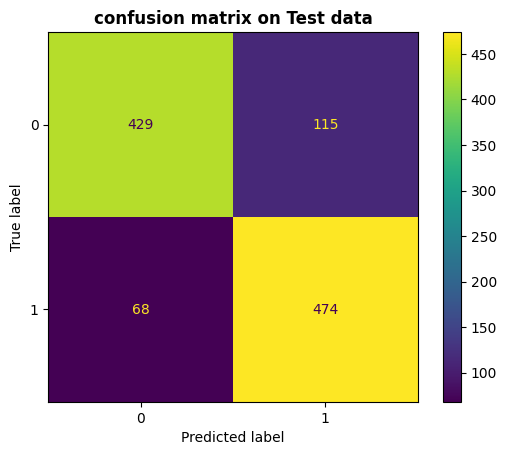

--------------------------------------------------------------------------------
           2291  2137  1740  1969  1703  1947  1004  5397  115   387 
y_actual      0     0     0     0     0     0     0     1     0     0
y_predict     0     0     0     0     1     0     0     1     0     0
--------------------------------------------------------------------------------


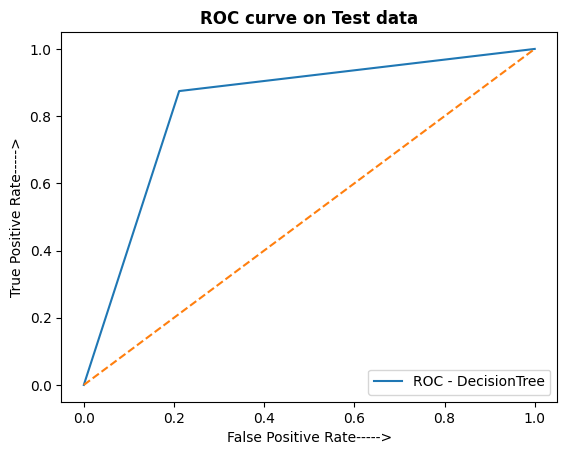

In [ ]:
predict(DecisionTreeClassifier(), 'DecisionTree')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Answer: Decision tree builds regression or classification models in the form of a tree structure.
It is working effectively on training dataset but lower accuracy on training. It probably due to overtfitting.

##### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer: It is showing improvement compared to logistic resgression. However accuracy is lower than KNN.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.
Recall is particularly important when the cost of false negatives (i.e., failing to identify positive instances) is high. For example, in medical diagnosis, a high recall ensures that fewer cases of a disease go undetected, reducing the risk of potential harm to patients.
<br>
Precision: It quantifies the proportion of true positive predictions among all positive predictions.
<BR>
F1 score: It provides a balanced measure of a model's performance, incorporating both precision and recall.
<br>
Accuracy: It measures the overall correctness of a model's predictions, calculating the proportion of correctly classified instances out of all instances.
<br>
Improved interpretability: Decision trees are highly interpretable models, which means that they can be easily understood and explained to non-technical stakeholders.

### **XGBoost**
XGBoost stands for Extreme Gradient Boosting. This technique is also used for both classification and regression problems. It works by iteratively adding decision trees to the models while focussing on errors. During each iteration XGBoost adjust the residual that leads to ultimately improving the accuracy score at the end of the last iteration.
<br>It also helps in overfitting and works much faster than gradient boosting algorithm.

**HyperParameter Tunning using GridSearchCV**

In [ ]:
xgb_params = {'n_estimators': [1000],    # number of trees in the ensemble
          'max_depth': [6,9],            # maximum number of levels allowed in each tree.
          'min_samples_split': [5,7],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [6,8],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[18:10:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 9],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7], 'n_estimators': [1000]},
             verbose=2)

In [ ]:
xgb_model = xgb_gridsearch.best_estimator_
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, min_samples_split=5,
              missing=nan, monotone_constraints=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

[18:11:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

train accuracy : 1.0
test accuracy : 0.909
train precision : 1.0
test precision : 0.928
train recall : 1.0
test recall : 0.886
train f1 : 1.0
test f1 : 0.907
train roc_auc : 1.0
test roc_auc : 0.953
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       544
           1       0.93      0.89      0.91       542

    accuracy                           0.91      1086
   macro avg       0.91      0.91      0.91      1086
weighted avg       0.91      0.91      0.91      1086

--------------------------------------------------------------------------------


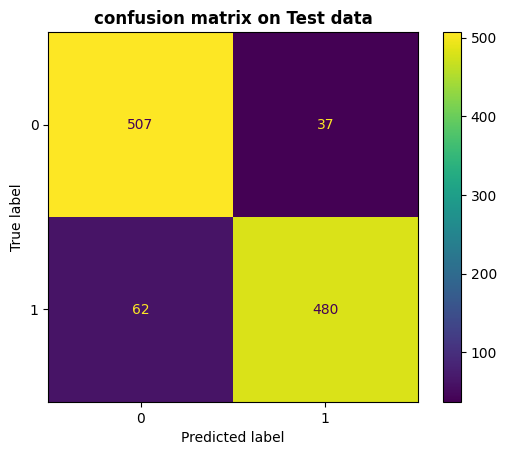

--------------------------------------------------------------------------------
           2291  2137  1740  1969  1703  1947  1004  5397  115   387 
y_actual      0     0     0     0     0     0     0     1     0     0
y_predict     0     0     0     0     1     0     0     1     0     0
--------------------------------------------------------------------------------


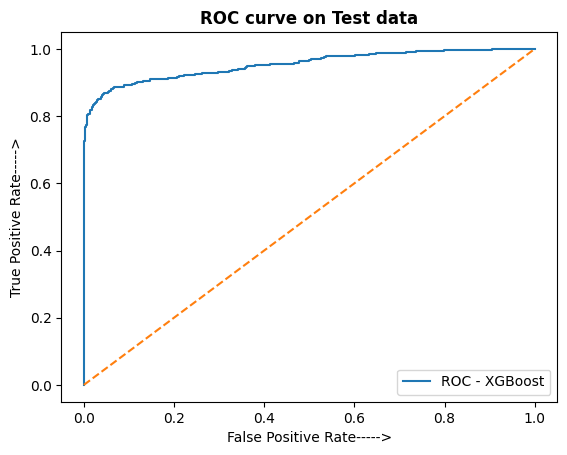

In [ ]:
predict(xgb_model, 'XGBoost')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Answer: XGBoost is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction.

##### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer: It is working exceptionally well than other algorithm with high accuracy, recall, precision and f1 score.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.
Recall is particularly important when the cost of false negatives (i.e., failing to identify positive instances) is high. For example, in medical diagnosis, a high recall ensures that fewer cases of a disease go undetected, reducing the risk of potential harm to patients.
<br>
Precision: It quantifies the proportion of true positive predictions among all positive predictions.
<BR>
F1 score: It provides a balanced measure of a model's performance, incorporating both precision and recall.
<br>
Accuracy: It measures the overall correctness of a model's predictions, calculating the proportion of correctly classified instances out of all instances.
<br>
High predictive performance: XGBoost often outperforms other machine learning algorithms in terms of predictive accuracy. 

### **Model Result**

In [ ]:
model_result = pd.DataFrame(model_result)
round(model_result,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc
0,LogisticRegression,0.805,0.795,0.859,0.857,0.730,0.707,0.789,0.775,0.887,0.877
1,SVM,0.863,0.830,0.941,0.916,0.774,0.725,0.849,0.809,0.943,0.911
2,KNN,1.000,0.884,1.000,0.848,1.000,0.935,1.000,0.889,1.000,0.884
3,DecisionTree,1.000,0.831,1.000,0.805,1.000,0.875,1.000,0.838,1.000,0.832
4,XGBoost,1.000,0.909,1.000,0.928,1.000,0.886,1.000,0.907,1.000,0.953


### 1. Which Evaluation metrics did you consider for a positive business impact and why?
Answer: Recall can be consider for positive business impact as it measures the correct positive instances out of all the actual positive instances. It is important in medical cases.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?
Answer:
KNN is chosen as the final model because the recall values is higher in KNN out of all the machine learning algorithm with 88% accuracy.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?
Answer: KNN is used for both classification and regression task. The main objective of the KNN is used to classify a new data point by looking at the k nearest neighbour in the training dataset. The value of k is a user defined parameter that determines the number of neighbours to consider. The distance between two point defines the closest neighbor. The distance can be calculated by Euclidean Distance, Manhattan Distance, Minkowski, Cosine Similarity Measure etc.)

# **Conclusion**
 In this project the goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) considering the other features.

- There are a total of 3390 records with 17 attributes.

- In feature engineering, we tried to balance data using SMOTE.

- Since the data is concerned with the healthcare industry, we closely observe the features that directly effects the target variable.

- Also, in the healthcare industry recall is the most important evaluation metric as it is more valid to predict true positive results.

- KNN and XGBoost are performing well. KNN with an accuracy of 88.4% and a recall percentage of 93.5%.

- XGboost has higher accuracy of around 90.9% but the recall percentage is lower than KNN.

- Decision trees are also doing moderately well but decision trees are more prone to overfitting. So, we can't rely on it.
That's why we have chosen **KNN** as our final machine-learning model.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***